In [90]:
# Importing necessary libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# Load the dataset
data = pd.read_csv('jd_unstructured_data.csv')

In [92]:
# Display the first few rows of the dataset to understand its structure
data.head()

   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

In [93]:
# Check the column names
data.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [94]:
# Drop unnecessary columns (e.g., 'Unnamed: 0' which might be an index column from previous processing)
data = data.drop(columns=['Unnamed: 0'])

In [95]:
# Display information about the dataset: types of columns and number of non-null entries
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB
None


In [96]:
# Check the data types of each column
print(data.dtypes)

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object


In [97]:
# Correcting data types of each column for consistency and proper analysis
data['Job Title'] = data['Job Title'].astype('category')  # Convert 'Job Title' to categorical
data['Salary Estimate'] = data['Salary Estimate'].astype('string')  # Ensure 'Salary Estimate' is a string type
data['Job Description'] = data['Job Description'].astype('string')  # Ensure 'Job Description' is a string type
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')  # Convert 'Rating' to numeric, coerce errors to NaN
data['Company Name'] = data['Company Name'].astype('category')  # Convert 'Company Name' to categorical
data['Location'] = data['Location'].astype('category')  # Convert 'Location' to categorical
data['Headquarters'] = data['Headquarters'].astype('category')  # Convert 'Headquarters' to categorical
data['Size'] = data['Size'].astype('category')  # Convert 'Size' to categorical
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')  # Convert 'Founded' year to numeric, coerce errors

In [98]:
# Display basic statistical details of the dataset, including unique counts for categorical columns
data.describe(include='all')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,956,956,956,956.000000,956,956,956,956,956.000000,956,956,956,956,956
unique,328,417,596,NaN,448,237,235,9,NaN,13,63,25,14,149
top,Data Scientist,-1,Day Shift: 7A-330P. Holidays and every other w...,NaN,Novartis\n3.8,"New York, NY","New York, NY",1001 to 5000 employees,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,178,214,4,NaN,14,78,75,177,NaN,532,148,239,299,634
mean,NaN,NaN,NaN,3.601255,NaN,NaN,NaN,NaN,1774.605649,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.067619,NaN,NaN,NaN,NaN,598.942517,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1937.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


In [99]:
# Check for missing values
data.isnull().sum()

,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0
Type of ownership,0


In [100]:
# Check for occurrences of invalid values (e.g., -1 often represents missing or invalid data)
print((data == -1).sum())

Job Title             0
Salary Estimate       0
Job Description       0
Rating               34
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded              97
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
dtype: Int64


In [101]:
# Replace invalid values (-1) with NaN
data.replace(-1, np.nan, inplace=True)

In [103]:
# Check the data types after transformations
data.dtypes

,0
Job Title,category
Salary Estimate,string[python]
Job Description,string[python]
Rating,float64
Company Name,category
Location,category
Headquarters,category
Size,category
Founded,float64
Type of ownership,category


# -------------------------
# Salary Estimate Preprocessing
# -------------------------

In [104]:
# Function to clean and preprocess salary estimates
def preprocess_salary(salary):
    if pd.isna(salary):  # Handle missing salary values
        return (None, None)

    # Define patterns for different salary formats
    hourly_pattern = r'\$(\d+)-\$(\d+) Per Hour'
    fixed_range_pattern = r'\$(\d+)K-\$(\d+)K'
    employer_provided_pattern = r'Employer Provided Salary:\$(\d+)K-\$(\d+)K'

    # Check if the salary is in hourly format
    hourly_match = re.search(hourly_pattern, salary)
    if hourly_match:
        min_hourly = int(hourly_match.group(1))
        max_hourly = int(hourly_match.group(2))
        # Convert hourly to weekly salary assuming a 40-hour work week
        min_salary = min_hourly * 40
        max_salary = max_hourly * 40
        return (min_salary, max_salary)

    # Check if the salary is in employer-provided format
    employer_match = re.search(employer_provided_pattern, salary)
    if employer_match:
        min_salary = int(employer_match.group(1)) * 1000
        max_salary = int(employer_match.group(2)) * 1000
        return (min_salary, max_salary)

    # Check if the salary is in a fixed range format
    fixed_match = re.search(fixed_range_pattern, salary)
    if fixed_match:
        min_salary = int(fixed_match.group(1)) * 1000
        max_salary = int(fixed_match.group(2)) * 1000
        return (min_salary, max_salary)

    # Return None for unhandled formats
    return (None, None)

In [105]:
# Make a copy of the data for salary processing
df = data.copy()

In [106]:
# Display unique values in the 'Salary Estimate' column to understand its range
print("Unique values in 'Salary Estimate':")
print(df['Salary Estimate'].unique())

Unique values in 'Salary Estimate':
<StringArray>
[          '$53K-$91K (Glassdoor est.)',
          '$63K-$112K (Glassdoor est.)',
           '$80K-$90K (Glassdoor est.)',
           '$56K-$97K (Glassdoor est.)',
          '$86K-$143K (Glassdoor est.)',
          '$71K-$119K (Glassdoor est.)',
           '$54K-$93K (Glassdoor est.)',
          '$86K-$142K (Glassdoor est.)',
           '$38K-$84K (Glassdoor est.)',
         '$120K-$160K (Glassdoor est.)',
 ...
          '$72K-$121K (Glassdoor est.)',
           '$51K-$88K (Glassdoor est.)',
         '$101K-$141K (Glassdoor est.)',
          '$79K-$127K (Glassdoor est.)',
          '$81K-$132K (Glassdoor est.)',
 'Employer Provided Salary:$120K-$140K',
          '$65K-$113K (Glassdoor est.)',
          '$59K-$125K (Glassdoor est.)',
          '$80K-$142K (Glassdoor est.)',
          '$62K-$113K (Glassdoor est.)']
Length: 417, dtype: string


In [107]:
# Apply salary preprocessing function to extract minimum and maximum salaries
salary_columns = df['Salary Estimate'].apply(preprocess_salary)
salary_columns.head()

In [109]:
# Assign the extracted salary data into new columns
df['Salary Min'], df['Salary Max'] = zip(*salary_columns)

In [110]:
# Calculate the median salary as the average of min and max salaries
df['Median Salary'] = (df['Salary Min'] + df['Salary Max']) / 2

In [111]:
# Drop original 'Salary Estimate' column and temporary salary columns
df.drop(columns=['Salary Estimate', 'Salary Min', 'Salary Max'], inplace=True)

In [113]:
# Display the first few rows of the updated DataFrame
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Median Salary
0,Data Scientist,"Data Scientist Location: Albuquerque, NM Educa...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,72000.0
1,Healthcare Data Scientist,What You Will Do: I. General Summary The Hea...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,87500.0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,85000.0
3,Data Scientist,*Organization and Job ID** Job ID: 310709 Dir...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",76500.0
4,Data Scientist,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",114500.0


# -------------------------
# Company Size Preprocessing
# -------------------------

In [114]:
df['Size'].unique()

['501 to 1000 employees', '10000+ employees', '1001 to 5000 employees', '51 to 200 employees', '201 to 500 employees', '5001 to 10000 employees', '1 to 50 employees', 'Unknown', '-1']
Categories (9, object): ['-1', '1 to 50 employees', '10000+ employees',
                         '1001 to 5000 employees', ..., '5001 to 10000 employees', '501 to 1000 employees',
                         '51 to 200 employees', 'Unknown']

In [115]:
# Function to clean and categorize company size
def preprocess_company_size(size):
    # Define mapping for company size with distinct labels
    size_mapping = {
        '1 to 50 employees': 'Very Small (1-50)',
        '51 to 200 employees': 'Small (51-200)',
        '201 to 500 employees': 'Medium (201-500)',
        '501 to 1000 employees': 'Medium-Large (501-1000)',
        '1001 to 5000 employees': 'Large (1001-5000)',
        '5001 to 10000 employees': 'Very Large (5001-10000)',
        '10000+ employees': 'Giant (10000+)',
        'Unknown': 'Unknown'
    }

    # Return mapped category or handle unexpected values
    return size_mapping.get(size, 'Unknown')

In [116]:
# Replace any remaining '-1' values with NaN
df.replace('-1', np.nan, inplace=True)

<ipython-input-116-f84a90cab338>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace('-1', np.nan, inplace=True)


In [117]:
# Convert 'Size' column to string for processing
df['Size'] = df['Size'].astype(str)

In [118]:
# Apply company size preprocessing function
df['Company Size'] = df['Size'].apply(preprocess_company_size)

In [119]:
# Convert 'Company Size' to categorical data
df['Company Size'] = df['Company Size'].astype('category')

In [120]:
# Display counts of each company size category
print(df['Company Size'].value_counts())

Company Size
Large (1001-5000)          177
Medium (201-500)           160
Small (51-200)             155
Giant (10000+)             154
Medium-Large (501-1000)    144
Very Large (5001-10000)     79
Very Small (1-50)           61
Unknown                     26
Name: count, dtype: int64


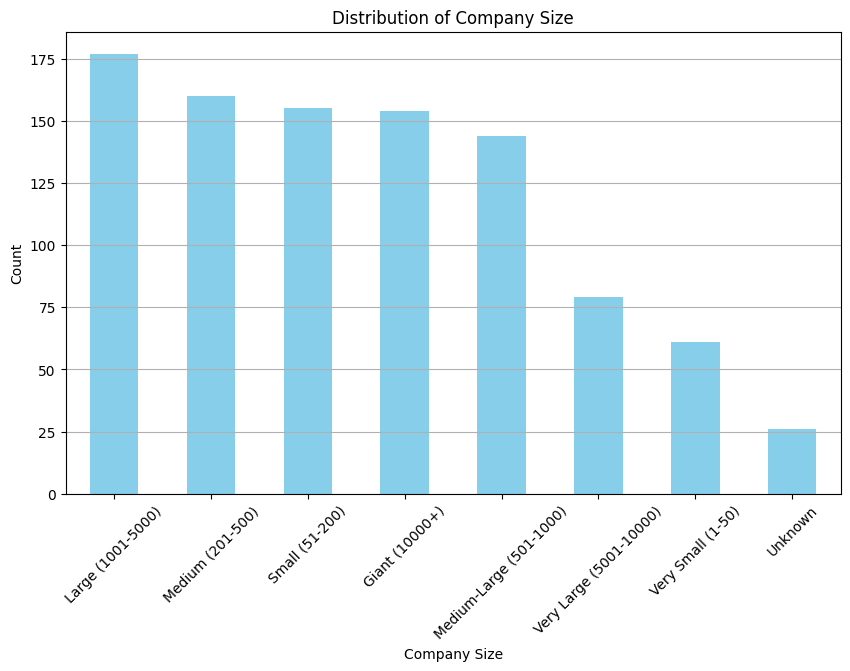

In [121]:
import matplotlib.pyplot as plt
# Plot a histogram to visualize the distribution of company sizes
plt.figure(figsize=(10, 6))
df['Company Size'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [122]:
# Drop the original 'Size' column since it has been replaced by 'Company Size'
df.drop(columns=['Size'], inplace=True)

# -------------------------
# Revenue Preprocessing
# -------------------------

In [123]:
# Function to clean and preprocess revenue information
def preprocess_revenue(revenue):
    # Check if the revenue is a string
    if not isinstance(revenue, str):
        return (None, None)

    # Define patterns for different revenue formats
    million_pattern = r'\$(\d+)(?: to \$(\d+))? million \(USD\)'
    billion_pattern = r'\$(\d+)(?: to \$(\d+))? billion \(USD\)'

    # Check for million format
    million_match = re.search(million_pattern, revenue)
    if million_match:
        min_revenue = int(million_match.group(1)) * 1_000_000
        max_revenue = int(million_match.group(2)) * 1_000_000 if million_match.group(2) else min_revenue
        return (min_revenue, max_revenue)

    # Check for billion format
    billion_match = re.search(billion_pattern, revenue)
    if billion_match:
        min_revenue = int(billion_match.group(1)) * 1_000_000_000
        max_revenue = int(billion_match.group(2)) * 1_000_000_000 if billion_match.group(2) else min_revenue
        return (min_revenue, max_revenue)

    # Handle specific cases
    if revenue == "Unknown / Non-Applicable":
        return (None, None)
    if revenue == "Less than $1 million (USD)":
        return (0, 1_000_000)

    # Return None for missing matches
    return (None, None)

In [124]:
# Convert 'Revenue' column to string for processing
df['Revenue'] = df['Revenue'].astype('string')

In [125]:
# Apply the revenue preprocessing function to the 'Revenue' column
revenue_columns = df['Revenue'].apply(preprocess_revenue)

In [126]:
# Display the first few rows of the resulting Series
revenue_columns.head()

,Revenue
0,"(50000000, 100000000)"
1,"(2000000000, 5000000000)"
2,"(100000000, 500000000)"
3,"(1000000000, 1000000000)"
4,"(None, None)"


In [127]:
# Unpack the tuples returned by the preprocessing function into two new columns: 'Min Revenue' and 'Max Revenue'
df['Min Revenue'], df['Max Revenue'] = zip(*revenue_columns)

In [128]:
# Calculate the median revenue by averaging the 'Min Revenue' and 'Max Revenue'
df['Median Revenue'] = (df['Min Revenue'] + df['Max Revenue']) / 2

In [129]:
# Display the current DataFrame columns to confirm the new columns have been added
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Competitors', 'Median Salary', 'Company Size',
       'Min Revenue', 'Max Revenue', 'Median Revenue'],
      dtype='object')

In [130]:
# Drop the 'Min Revenue' and 'Max Revenue' columns as they are no longer needed
df.drop(columns=['Min Revenue', 'Max Revenue'], inplace=True)

In [131]:
# Drop the original 'Revenue' column as it has been processed into structured numerical values
df.drop(columns=['Revenue'], inplace=True)

In [132]:
# Save the cleaned and structured DataFrame to a new CSV file
df.to_csv('jd_structured_data.csv', index=False)